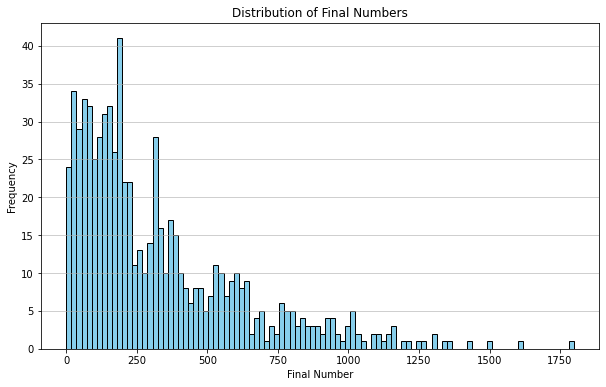

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import halfnorm, kstest

def simulate_process():
    numbers = list(range(1, 2025))
    while len(numbers) > 1:
        a, b = random.sample(numbers, 2)
        difference = abs(a - b)
        numbers.remove(a)
        numbers.remove(b)
        numbers.append(difference)
    return numbers[0]

num_simulations = 724
final_numbers = [simulate_process() for _ in range(num_simulations)]
plt.figure(figsize=(10, 6))
plt.hist(final_numbers, bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Numbers')
plt.xlabel('Final Number')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

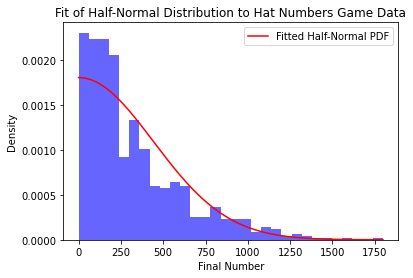

KS Statistic: 0.1251494551033887, P-value: 2.419233534821722e-10


In [4]:
fitted_parameters = halfnorm.fit(final_numbers)

ks_statistic, p_value = kstest(final_numbers, 'halfnorm', args=fitted_parameters)
x_values = np.linspace(0, max(final_numbers), 1000)
pdf_fitted = halfnorm.pdf(x_values, loc=fitted_parameters[0], scale=fitted_parameters[1])

plt.hist(final_numbers, bins=30, density=True, alpha=0.6, color='b')
plt.plot(x_values, pdf_fitted, 'r-', label='Fitted Half-Normal PDF')
plt.title('Fit of Half-Normal Distribution to Hat Numbers Game Data')
plt.xlabel('Final Number')
plt.ylabel('Density')
plt.legend()
plt.show()
print(f"KS Statistic: {ks_statistic}, P-value: {p_value}")